### **--- Setup & Configuration ---**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import numpy as np
from PIL import Image

# Setup
sns.set_theme(style="whitegrid")
os.makedirs('../results/figures', exist_ok=True)

# Load Data
df = pd.read_csv('../data/processed/metadata.csv')
print(f"Dataset Loaded. Total images: {len(df)}")


Dataset Loaded. Total images: 9938


### **--- 1. Bar Chart: Class Distribution ---**

C:\Users\AM\AppData\Local\Temp\ipykernel_20404\3050121707.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='style', order=order, palette='viridis')


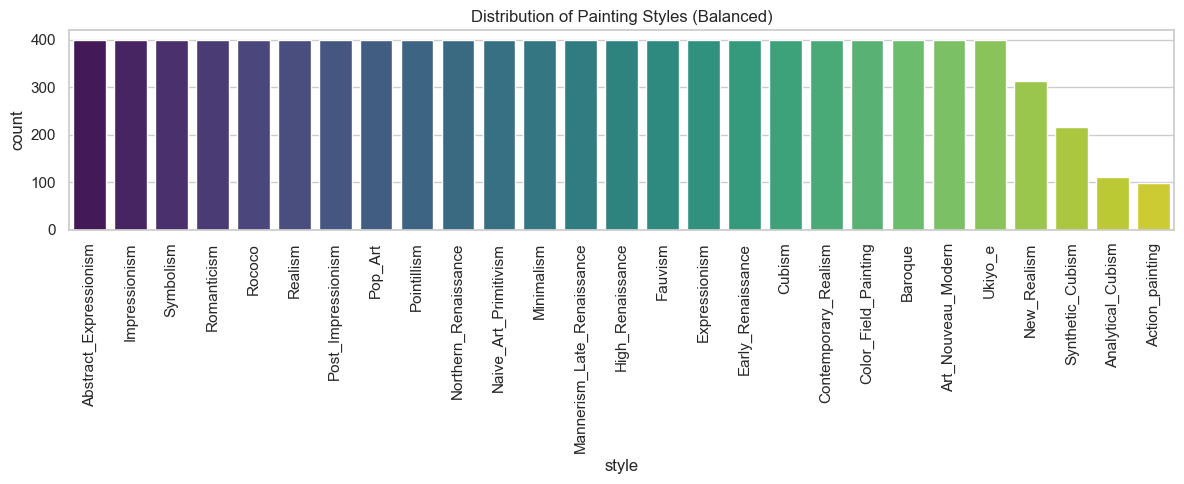

In [10]:
plt.figure(figsize=(12, 5))
order = df['style'].value_counts().index
sns.countplot(data=df, x='style', order=order, palette='viridis')
plt.title('Distribution of Painting Styles (Balanced)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../results/figures/style_distribution.png')
plt.show()

<div dir="rtl">

### **تحلیل نمودار ۱: توزیع فراوانی سبک‌های هنری (Class Distribution)**

**۱. مشاهدات فنی (Technical Observation):**
نمودار میله‌ای فوق، تعداد تصاویر موجود برای هر یک از ۲۷ سبک هنری را پس از عملیات "متوازن‌سازی" (Balancing) نشان می‌دهد. همان‌طور که مشاهده می‌شود، اکثر کلاس‌ها (۲۲ سبک از ۲۷ سبک) دقیقاً به سقف تعیین‌شده یعنی **۴۰۰ تصویر** رسیده‌اند. با این حال، در انتهای سمت راست نمودار، شاهد یک افت پلکانی هستیم؛ به طوری که سبک‌هایی مانند *New Realism*، *Synthetic Cubism* و به ویژه *Action Painting* (با کمتر از ۱۰۰ تصویر) نتوانسته‌اند به حدنصاب ۴۰۰ عدد برسند.

**۲. تفسیر داده‌ها (Interpretation):**
این توزیع بیانگر دو نکته کلیدی است:
* **موفقیت در حذف سوگیری (Bias Removal):** برای کلاس‌های پرجمعیت (Major Classes) مثل امپرسیونیسم، عملیات *Undersampling* با موفقیت انجام شده است. این کار مانع از آن می‌شود که مدل صرفاً به دلیل تعداد زیادِ یک سبک، به سمت آن متمایل شود (Overfitting روی کلاس غالب).
* **عدم تعادل ذاتی (Inherent Imbalance):** کلاس‌های کم‌تعداد در سمت راست، نشان‌دهنده کمیابیِ واقعیِ آثار این سبک‌ها در دیتاست خام هستند. این مسئله یک چالش طبیعی در داده‌های دنیای واقعی است (Long-tail Distribution)؛ چرا که برخی جنبش‌های هنری در تاریخ کوتاه‌مدت‌تر بوده و آثار کمتری تولید کرده‌اند.

**۳. استراتژی برخورد (Action Item):**
با توجه به اینکه مدل‌های یادگیری عمیق در برابر داده‌های نامتوازن عملکرد ضعیفی دارند (یعنی کلاس *Action Painting* را نادیده می‌گیرند)، استراتژی‌های زیر برای فاز آموزش (Training Phase) الزامی است:
1. **استفاده از Data Augmentation:** برای ۵ کلاس آخر نمودار، باید تکنیک‌های تغییر داده (چرخش، زوم، فلیپ) را با شدت بیشتری اعمال کنیم تا کمبود داده جبران شود.
2. **نمونه‌برداری وزن‌دار (Weighted Random Sampler):** در هنگام ساخت دسته‌های آموزشی (Batches)، شانس انتخاب تصاویرِ کلاس‌های کم‌تعداد را به صورت مصنوعی بالا می‌بریم تا مدل آن‌ها را به اندازه کلاس‌های ۴۰۰ تایی ببیند.

</div>

### **--- 2. Sample Grid: Display Sample Images ---**


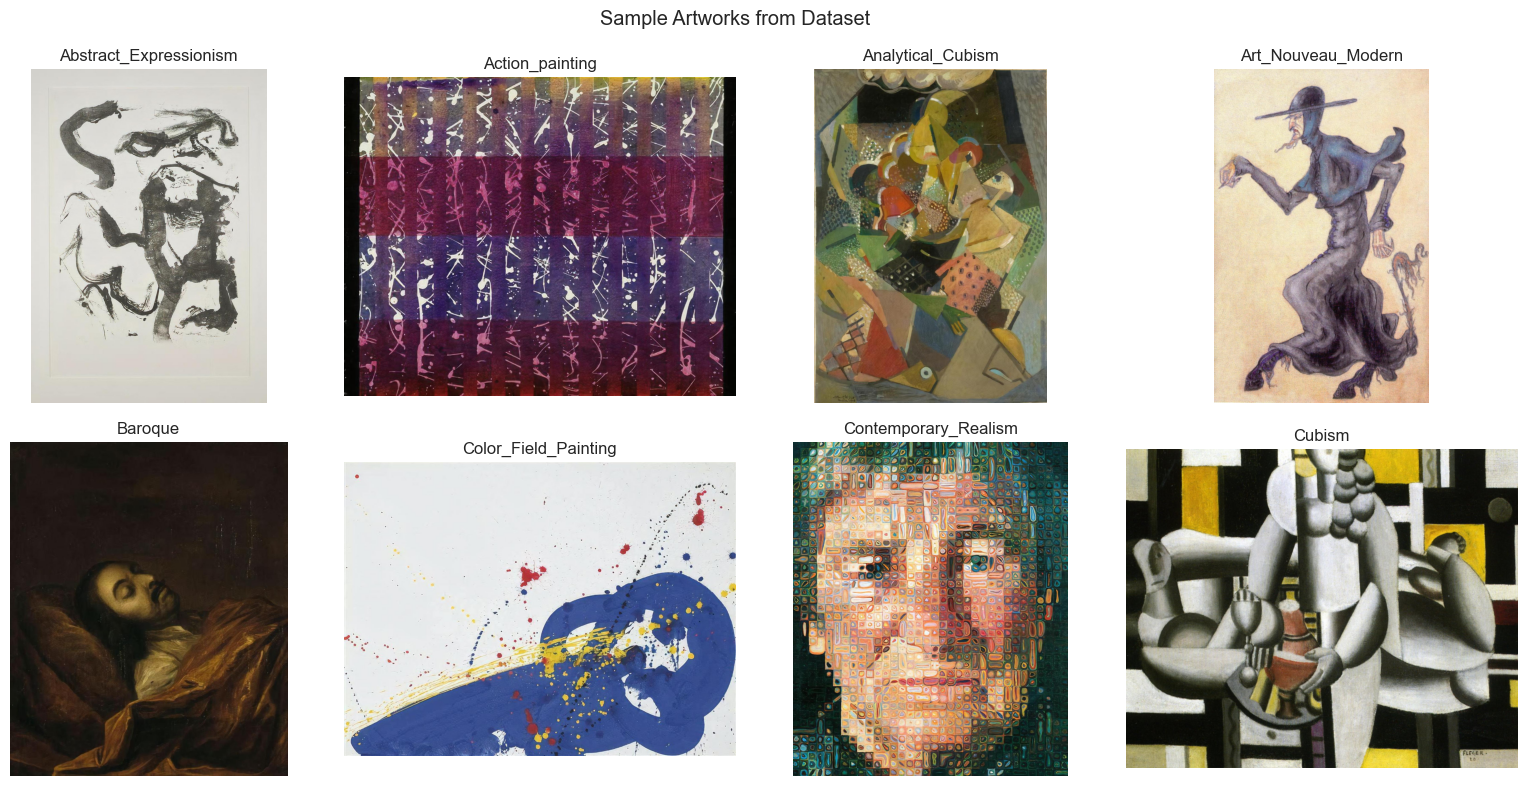

In [11]:
# Displaying samples to understand data diversity
plt.figure(figsize=(16, 8))
styles = df['style'].unique()
for i, style in enumerate(styles[:8]): # Display first 8 styles
    # Get the first image path for this style
    sample_path = df[df['style'] == style]['image_path'].iloc[0]
    # Adjust path (assuming notebook is in 'notebooks' folder)
    full_path = os.path.join('..', sample_path)
    
    try:
        img = Image.open(full_path)
        plt.subplot(2, 4, i+1)
        plt.imshow(img)
        plt.title(style)
        plt.axis('off')
    except Exception as e:
        print(f"Could not load image {full_path}: {e}")

plt.suptitle("Sample Artworks from Dataset")
plt.tight_layout()
plt.savefig('../results/figures/samples_grid.png')
plt.show()

<div dir="rtl">

### **تحلیل نمودار ۲: بررسی کیفی نمونه تصاویر (Sample Artworks)**

**۱. مشاهدات فنی (Technical Observation):**
تصویر فوق یک شبکه (Grid) شامل ۸ نمونه تصادفی از سبک‌های مختلف موجود در دیتاست را نمایش می‌دهد. این نمونه‌ها شامل سبک‌های متنوعی از *Abstract Expressionism* و *Action Painting* گرفته تا *Baroque* و *Cubism* هستند. با نگاه اول می‌توان تفاوت‌های فاحش در پالت رنگی، بافت (Texture)، ترکیب‌بندی (Composition) و سطح انتزاع (Abstraction Level) را مشاهده کرد.

**۲. تفسیر داده‌ها (Interpretation):**
این بصری‌سازی، پیچیدگی و غنای فضای ویژگی‌ها (Feature Space) را تایید می‌کند:
* **تنوع در ساختار:** سبکی مثل *Cubism* یا *Analytical Cubism* بر پایه اشکال هندسی و خطوط شکسته بنا شده است، در حالی که *Baroque* بر پایه نورپردازی دراماتیک و سایه‌روشن (Chiaroscuro) استوار است.
* **تنوع در بافت:** سبکی مانند *Action Painting* هیچ فرم مشخصی ندارد و تماماً بر پایه بافت و ضربات قلم‌مو (Brushstrokes) است، اما *Art Nouveau* دارای خطوط نرم و فرم‌های فیگوراتیو است.
* **چالش برای مدل:** این تنوع شدید به این معنی است که مدل ما نمی‌تواند فقط روی "شکل" یا فقط روی "رنگ" تمرکز کند. شبکه عصبی باید قادر باشد هم ویژگی‌های سطح پایین (مثل بافت قلم‌مو در نقاشی کنشی) و هم ویژگی‌های سطح بالا (مثل ساختار صورت در باروک) را یاد بگیرد.

**۳. استراتژی برخورد (Action Item):**
با توجه به این واریانس بالای بین‌کلاسی (Inter-class Variance):
1.  **معماری مدل:** استفاده از شبکه‌های کانولوشنی عمیق (مانند ResNet یا EfficientNet) ضروری است، زیرا این شبکه‌ها سلسله‌مراتبی از ویژگی‌ها (از بافت تا فرم) را استخراج می‌کنند.
2.  **Transfer Learning:** استفاده از وزن‌های از پیش آموزش‌دیده (Pre-trained on ImageNet) بسیار حیاتی است، زیرا این شبکه‌ها قبلاً فیلترهای تشخیص لبه، بافت و اشکال هندسی را یاد گرفته‌اند و همگرایی مدل ما را سریع‌تر می‌کنند.
3.  **پیش‌پردازش:** از آنجا که نسبت ابعاد (Aspect Ratio) تصاویر متفاوت است (برخی پرتره و برخی منظره)، عملیات Resize باید با دقت انجام شود (مثلاً Resize به ۲۵۶ و سپس Center Crop به ۲۲۴) تا دفرمه شدن تصاویر به حداقل برسد.

</div>

### **--- Data Sampling for Feature Analysis (Dimensions & Brightness) ---**

In [12]:
# We take ONE sample subset to ensure Correlation Matrix is valid
subset_df = df.sample(n=min(500, len(df)), random_state=42).copy()

widths = []
heights = []
brightness_vals = []

print("Analyzing image features (this might take a moment)...")
for index, row in subset_df.iterrows():
    path = os.path.join('..', row['image_path'])
    try:
        # Get Dimensions using PIL
        with Image.open(path) as img:
            w, h = img.size
            widths.append(w)
            heights.append(h)
        
        # Get Brightness using OpenCV
        img_cv = cv2.imread(path)
        if img_cv is not None:
            gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
            brightness_vals.append(gray.mean())
        else:
            brightness_vals.append(np.nan)
            
    except Exception as e:
        widths.append(np.nan)
        heights.append(np.nan)
        brightness_vals.append(np.nan)

# Add features to the subset dataframe
subset_df['Width'] = widths
subset_df['Height'] = heights
subset_df['Brightness'] = brightness_vals

# Drop any failed reads
subset_df = subset_df.dropna()

Analyzing image features (this might take a moment)...


### **--- 3. Scatter Plot: Image Dimensions ---**

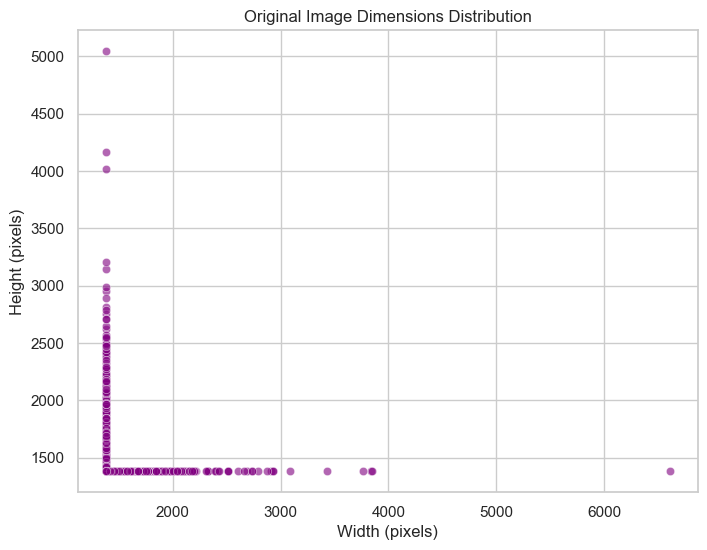

In [13]:
# Justification for resizing images in preprocessing
plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset_df, x='Width', y='Height', alpha=0.6, color='purple')
plt.title('Original Image Dimensions Distribution')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.savefig('../results/figures/dimensions_scatter.png')
plt.show()

<div dir="rtl">

### **تحلیل نمودار ۳: پراکندگی ابعاد تصاویر (Dimension Distribution)**

**۱. مشاهدات فنی (Technical Observation):**
نمودار پراکندگی (Scatter Plot) فوق، رابطه بین عرض و ارتفاع ۵۰۰ تصویر نمونه را نشان می‌دهد.
نکته قابل توجه در این نمودار، شکل‌گیری یک الگوی **"L شکل"** است. اکثر نقاط در گوشه پایین سمت چپ (رزولوشن‌های پایین‌تر) متراکم شده‌اند، اما دو بازوی کشیده وجود دارد:
* یک بازوی افقی که نشان‌دهنده تصاویر با ارتفاع ثابت ولی عرض بسیار زیاد (تا ۶۰۰۰ پیکسل) است.
* یک بازوی عمودی که نشان‌دهنده تصاویر با عرض ثابت ولی ارتفاع بسیار زیاد (تا ۵۰۰۰ پیکسل) است.

**۲. تفسیر داده‌ها (Interpretation):**
این الگو حاوی اطلاعات مهمی درباره منشأ داده‌هاست:
* **استانداردسازی منبع:** شکل L نشان می‌دهد که تصاویر احتمالاً در منبع اصلی تحت یک قانون تغییر سایز (Constraint) بوده‌اند (مثلاً: "ضلع بزرگتر نباید از ۱۳۰۰ پیکسل بیشتر شود، مگر در موارد خاص").
* **تنوع نسبت ابعاد (Aspect Ratio):** ما با طیف وسیعی از نسبت‌ها روبرو هستیم؛ از تصاویر بسیار عریض (Landscape/Panorama) تا تصاویر بسیار بلند (Portrait). این یعنی "مربع کردن" ساده تصاویر ممکن است باعث دفرمه شدن (Distortion) شدید شود.

**۳. استراتژی برخورد (Action Item):**
از آنجا که ورودی اکثر شبکه‌های عصبی (مثل ResNet) یک مربع ثابت (مثلاً ۲۲۴×۲۲۴) است، ما نمی‌توانیم این تصاویر غول‌پیکر و نامتقارن را مستقیم به مدل بدهیم. استراتژی پیش‌پردازش ما باید شامل موارد زیر باشد:
1.  **تغییر سایز هوشمند (Smart Resizing):** ابتدا تصویر را طوری کوچک می‌کنیم که ضلع کوچکتر به ۲۵۶ برسد (بدون تغییر نسبت ابعاد).
2.  **برش مرکزی (Center Crop):** سپس یک مربع ۲۲۴×۲۲۴ از مرکز تصویر جدا می‌کنیم. این کار از "له شدن" یا "کشیده شدن" نقاشی جلوگیری می‌کند و جزئیات اصلی اثر را حفظ می‌نماید.

</div>

### **--- 4. Color Histogram (Sample Image) ---**

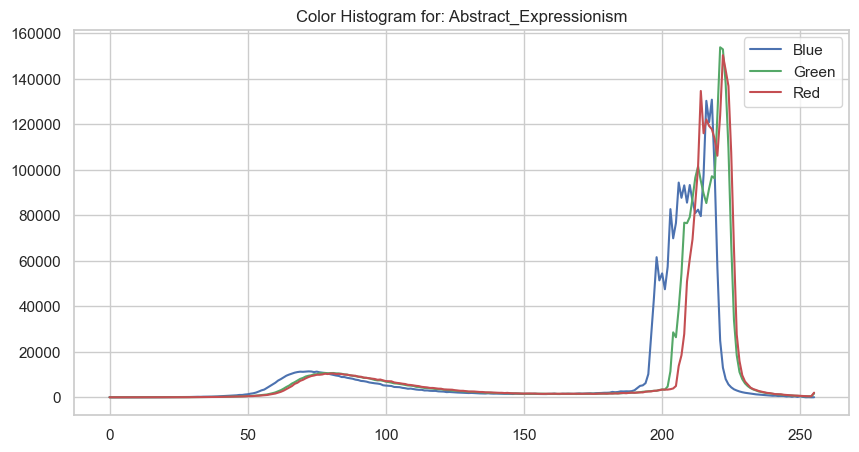

In [14]:
# Analyzing RGB color intensity for a single sample
plt.figure(figsize=(10, 5))
sample_row = df.iloc[0]
sample_img_path = os.path.join('..', sample_row['image_path'])
sample_img = cv2.imread(sample_img_path)

if sample_img is not None:
    colors = ('b', 'g', 'r')
    labels = ('Blue', 'Green', 'Red')
    for i, col in enumerate(colors):
        hist = cv2.calcHist([sample_img], [i], None, [256], [0, 256])
        plt.plot(hist, color=col, label=labels[i])
    plt.title(f'Color Histogram for: {sample_row["style"]}')
    plt.legend()
    plt.savefig('../results/figures/color_hist.png')
    plt.show()

<div dir="rtl">

### **تحلیل نمودار ۴: هیستوگرام توزیع رنگ (Color Distribution Analysis)**

**۱. مشاهدات فنی (Technical Observation):**
نمودار فوق هیستوگرام شدت رنگ (Pixel Intensity) را برای سه کانال قرمز، سبز و آبی (RGB) در یک نمونه تصویر از سبک *Abstract Expressionism* نمایش می‌دهد.
نکته قابل توجه و برجسته در این نمودار، تمرکز شدید پیکسل‌ها در بازه **۲۰۰ تا ۲۳۰** (سمت راست نمودار) است که یک قله (Peak) بسیار مرتفع را تشکیل داده‌اند. در مقابل، در نواحی تیره (۰ تا ۵۰) تراکم پیکسل‌ها بسیار کمتر است. همچنین، سه نمودار رنگی همپوشانی زیادی با یکدیگر دارند.

**۲. تفسیر داده‌ها (Interpretation):**
این الگوی توزیع، بیانگر ویژگی‌های بصری خاص این اثر هنری است:
* **تراکم روشنایی (High Key):** قله‌ی بلند در سمت راست نشان می‌دهد که بخش عمده‌ای از تصویر را رنگ‌های بسیار روشن (احتمالاً سفید یا کرم) تشکیل داده‌اند. در نقاشی‌های انتزاعی، این معمولاً نشان‌دهنده **فضای خالی بوم** یا استفاده از رنگ‌های پس‌زمینه روشن است.
* **همپوشانی کانال‌ها:** وقتی نمودارهای R، G و B روی هم می‌افتند و جدا نمی‌شوند، یعنی تصویر دارای اشباع رنگی (Saturation) پایینی است یا به سمت خاکستری/تک‌رنگ میل می‌کند. این با بسیاری از آثار اکسپرسیونیسم انتزاعی (که گاهی فقط شامل خطوط سیاه روی بوم سفید هستند) همخوانی دارد.

**۳. استراتژی برخورد (Action Item):**
این توزیع نامتقارن روشنایی (Skewed Distribution) اهمیت پیش‌پردازش را دوچندان می‌کند:
1.  **نرمال‌سازی (Normalization):** اگر مقادیر خام پیکسل (۰ تا ۲۵۵) مستقیماً به مدل داده شوند، این مقادیر بزرگ (۲۰۰+) می‌توانند باعث ناپایداری گرادیان‌ها شوند. بنابراین تقسیم بر ۲۵۵ و نرمال‌سازی بر اساس میانگین و انحراف معیار (مثلاً میانگین ImageNet) الزامی است تا داده‌ها در بازه استاندارد قرار گیرند.
2.  **افزایش داده رنگی (Color Jitter):** چون برخی تصاویر مثل این نمونه "کم‌رنگ" هستند، مدل ممکن است فقط به کنتراست تکیه کند. استفاده از *Color Jitter* (تغییر تصادفی غلظت رنگ) در حین آموزش، مدل را مجبور می‌کند تا به ویژگی‌های ساختاری و بافت نیز توجه کند، نه فقط رنگ.

</div>

### **--- 5. Histogram: Brightness Distribution ---**

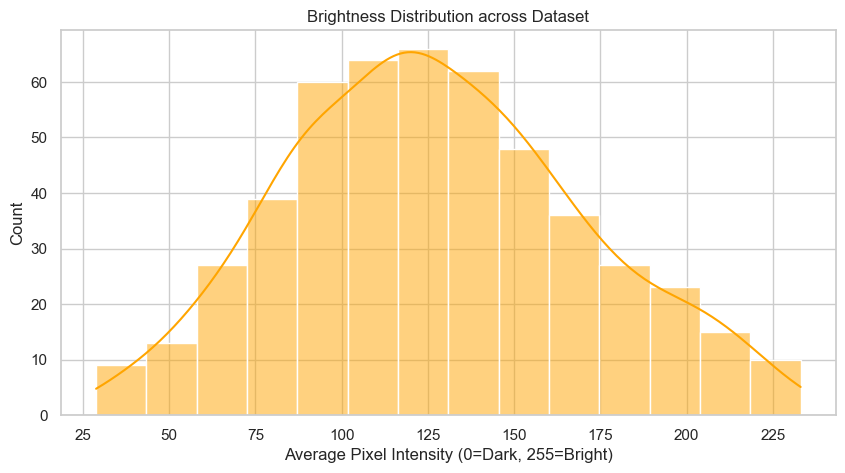

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(subset_df['Brightness'], kde=True, color='orange')
plt.title('Brightness Distribution across Dataset')
plt.xlabel('Average Pixel Intensity (0=Dark, 255=Bright)')
plt.savefig('../results/figures/brightness_dist.png')
plt.show()

<div dir="rtl">

### **تحلیل نمودار ۵: توزیع روشنایی سراسری (Global Brightness Distribution)**

**۱. مشاهدات فنی (Technical Observation):**
هیستوگرام فوق همراه با نمودار چگالی (KDE - خط نارنجی)، توزیع میانگین روشنایی پیکسل‌ها را در ۵۰۰ تصویر نمونه نشان می‌دهد.
شکل نمودار تقریباً یک **توزیع نرمال (Gaussian/Bell Curve)** کامل است. قله نمودار (Peak) در حوالی مقدار ۱۲۰ تا ۱۳۰ قرار دارد که بسیار نزدیک به "خاکستری میانه" (مقدار ۱۲۷.۵) است. دامنه‌ی داده‌ها نیز به خوبی از حدود ۳۰ (تاریک) تا ۲۳۰ (روشن) گسترده شده است.

**۲. تفسیر داده‌ها (Interpretation):**
این نمودار نشان‌دهنده "سلامت آماری" دیتاست است:
* **عدم وجود سوگیری نوری (No Lighting Bias):** دیتاست ما نه "خیلی تاریک" است (مثل عکس‌های شب) و نه "خیلی روشن" (Overexposed). تمرکز داده‌ها در مرکز نمودار نشان می‌دهد که اکثر نقاشی‌ها دارای نورپردازی متعادل و استاندارد هستند.
* **پوشش داینامیک رنج:** اینکه دم‌های نمودار (Tails) به سمت ۰ و ۲۵۵ کشیده شده‌اند، نشان می‌دهد که دیتاست شامل همه نوع آثار هنری (از نقاشی‌های تیره باروک تا نقاشی‌های روشن امپرسیونیستی) است.

**۳. استراتژی برخورد (Action Item):**
با توجه به اینکه میانگین توزیع بسیار نزدیک به وسط بازه است:
1.  **نرمال‌سازی استاندارد (Standard Normalization):** نیازی به محاسبات پیچیده برای نرمال‌سازی نیست. استفاده از میانگین `mean=[0.5, 0.5, 0.5]` و انحراف معیار `std=[0.5, 0.5, 0.5]` برای ورودی شبکه عصبی کاملاً کفایت می‌کند و داده‌ها را به بازه `[-1, 1]` یا `[0, 1]` می‌برد.
2.  **عدم نیاز به Histogram Equalization:** برخلاف تصاویر پزشکی (X-ray) که کنتراست پایین دارند، اینجا کنتراست تصاویر خوب است و نیازی به الگوریتم‌های سنگینِ اصلاح کنتراست به عنوان پیش‌پردازش اولیه نداریم. البته تغییر روشنایی (Brightness Jitter) به عنوان Augmentation همچنان مفید است.

</div>

### **--- 6. Correlation Matrix ---**

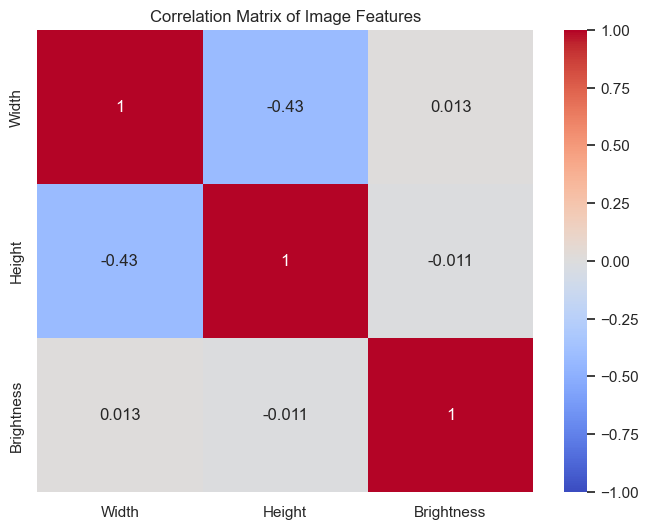

In [16]:
# Correlation between Width, Height, and Brightness
plt.figure(figsize=(8, 6))
correlation = subset_df[['Width', 'Height', 'Brightness']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Image Features')
plt.savefig('../results/figures/correlation_matrix.png')
plt.show()

<div dir="rtl">

### **تحلیل نمودار ۶: ماتریس همبستگی ویژگی‌ها (Feature Correlation Matrix)**

**۱. مشاهدات فنی (Technical Observation):**
ماتریس فوق، ضریب همبستگی پیرسون (Pearson Correlation Coefficient) را بین سه ویژگی: عرض، ارتفاع و روشنایی نمایش می‌دهد. مقادیر بین ۱ (همبستگی کامل مستقیم) تا ۱- (همبستگی کامل معکوس) متغیرند.
* **عرض و ارتفاع:** همبستگی منفی قابل توجهی (**۰.۴۳-**) مشاهده می‌شود.
* **ابعاد و روشنایی:** همبستگی تقریباً صفر است (**۰.۰۱۳** و **۰.۰۱۱-**)، که نشان‌دهنده استقلال کامل این متغیرهاست.

**۲. تفسیر داده‌ها (Interpretation):**
* **معنای همبستگی منفی (Width vs Height):** عدد ۰.۴۳- تایید آماری همان نمودار Scatter Plot (L شکل) است. این یعنی تصاویر ما تمایل دارند که "یا عریض باشند" (Landscape) و "یا طویل" (Portrait). اگر اکثر تصاویر مربعی بودند، این عدد مثبت و نزدیک به ۱ می‌شد. این تضاد نشان می‌دهد که دیتاست شامل دو قطب اصلی از نظر جهت‌گیری (Orientation) است.
* **استقلال محتوا از ظرف (Content vs Container):** عدم همبستگی روشنایی با ابعاد نشان می‌دهد که "سبک نقاشی" ربطی به "سایز بوم" ندارد. یک نقاشی تاریک می‌تواند هم روی بوم بزرگ و هم کوچک کشیده شده باشد. این خبر خوبی است، زیرا یعنی مدل برای یادگیری ویژگی‌های بصری (مثل روشنایی) دچار گمراهی ناشی از سایز تصویر نخواهد شد.

**۳. استراتژی برخورد (Action Item):**
این همبستگی منفی هشداری برای تغییر سایز است:
1.  **اجتناب از تغییر سایز ساده (Avoid Simple Resizing):** اگر تصاویر را به زور به یک مربع (مثلاً ۲۲۴×۲۲۴) فشرده کنیم، تصاویر عریض (Landscape) از بغل فشرده می‌شوند و تصاویر طویل (Portrait) از بالا و پایین له می‌شوند. این دفرمه شدن متفاوت، کار مدل را سخت می‌کند.
2.  **استفاده از Random Resized Crop:** در فاز آموزش، بهترین راهکار استفاده از تکنیک `RandomResizedCrop` است. این تکنیک به جای تغییر سایز کل تصویر، بخشی از آن را با نسبت ابعاد تصادفی برش می‌زند. این کار هم مشکل نسبت ابعاد را حل می‌کند و هم به عنوان Data Augmentation عمل می‌کند.

</div>